## Chinbook Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3

### Creating Helper Function 

In [2]:
#Define function that takes SQL query and returns a panda dataframe
def run_query(q): 
    with sqlite3.connect('chinook.db') as conn: 
        return pd.read_sql(q, conn)

#Define function that takes SQL command and execute through sqlite module
def run_command(c): 
    with sqlite3.connect('chinook.db')as conn: 
        conn.isolation_level=None
        conn.execute(c)

#Define function returning a list of all tables and views in the database
def show_tables(): 
    q='''select name, type
         from sqlite_master 
         where type in ('table', 'view')'''
    return run_query(q)

show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


### Most popular music genre in USA

In [19]:
#Which genres sell the most in the USA?
q1='''
WITH usatrack as
    (
    select i_l.*
    from customer c
    inner join invoice i on c.customer_id=i.customer_id
    inner join invoice_line i_l on i.invoice_id=i_l.invoice_id
    where c.country="USA"
    )
    
select g.name as genre, 
       count(ut.quantity) as track_sold_usa,
       cast(count(ut.quantity) as float)/(select count(*) from usatrack) as track_sold_usa_percentages
from usatrack as ut
inner join track t on ut.track_id=t.track_id
inner join genre g on t.genre_id=g.genre_id
group by 1
order by 2 desc
limit 10;
'''
run_query(q1)

,genre,track_sold_usa,track_sold_usa_percentages
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


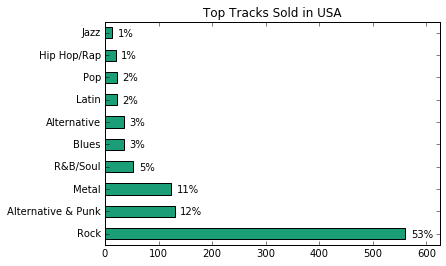

In [21]:
#review plz
#visualization 
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

genre_sales_usa = run_query(q1)
genre_sales_usa.set_index("genre", inplace=True, drop=True)
genre_sales_usa["track_sold_usa"].plot.barh(
    title="Top Tracks Sold in USA",
    xlim = (0,625),
    colormap = plt.cm.Dark2
)
plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "track_sold_usa"]
    label = (genre_sales_usa.loc[label, "track_sold_usa_percentages"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15)) # gives some white space for label

plt.show()

As shown in the graph above, we see Rock, Alternative & Punk and Metal as the top 3 genre in the US. Given that Pop is slightly more popular than Hip Hop/Rap, I would recommend carrying Red Tone(Alternative & Punk), Slim Jim Bites(Blues) and Meteor and the Girls(Pop). 

## Employee Sales Performance

In [34]:
q2='''
select 
    e.first_name || " " || e.last_name as employee, 
    e.hire_date as hire_date,
    sum(i.total) as total_sales
from employee e
left join customer c on e.employee_id=c.support_rep_id
inner join invoice i on c.customer_id=i.customer_id
group by 1
order by 3'''

run_query(q2)

,employee,hire_date,total_sales
0,Steve Johnson,2017-10-17 00:00:00,1393.92
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Jane Peacock,2017-04-01 00:00:00,1731.51


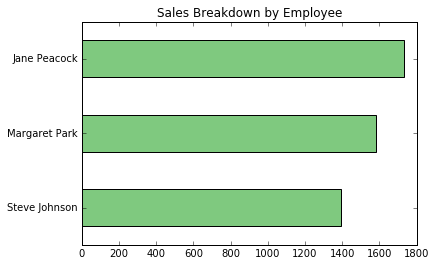

In [35]:
#review plz
#visualization 
employee_sales = run_query(q2)

employee_sales.set_index("employee", drop=True, inplace=True)
employee_sales.sort_values("total_sales", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Sales Breakdown by Employee',
    colormap=plt.cm.Accent
)
plt.ylabel('')
plt.show()

Peacock has the most sales--followed by Park and Johnson. The total sales amount does not take into account how long each employee has been working with the company. For futher analysis, it would be ideal to look at each employees' sales for a specific time range. 

### Sales by Country 

In [ ]:
q3='''
create view '''